In [3]:
import os
import pandas as pd
import nibabel as nib

def process_nii_files(folder_path):
    # Initialize an empty list to store file names and voxel counts
    info = []

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):

            file_path = os.path.join(folder_path, filename)
            img = nib.load(file_path)
            data = img.get_fdata()

            voxel_count = (data > -3900).sum()
            total_voxel = data.shape[0] * data.shape[1] * data.shape[2]
            info_ratio = voxel_count / total_voxel
            info.append({'Filename': filename, 'Axis 0' : data.shape[0], 'Axis 1': data.shape[1], 'Axis 2': data.shape[2],'Infomative voxel': voxel_count, 'Total voxel': total_voxel, 'Ratio': info_ratio})

    # Create a DataFrame from the data
    df = pd.DataFrame(info)
    return df

# Example usage
folder_path = r"C:\Users\acer\Desktop\Data_Prep_3\CropTMJ2"
df = process_nii_files(folder_path)
print(df)


                                              Filename  Axis 0  Axis 1  \
0    4716872_2018_11_29_L_masked_cropped_cropTMJ.ni...     191     160   
1    4716872_2018_11_29_R_masked_cropped_flipped_cr...     173     171   
2    4722136_2019_10_31_L_masked_cropped_cropTMJ.ni...     169     141   
3    4722136_2019_10_31_R_masked_cropped_flipped_cr...     145     131   
4    474881_2014_09_25_L_masked_cropped_cropTMJ.nii.gz     156     162   
..                                                 ...     ...     ...   
370  66700362_2023_07_03_R_masked_cropped_flipped_c...     164     173   
371  66700404_2023_08_26_L_masked_cropped_cropTMJ.n...     203     189   
372  66700404_2023_08_26_R_masked_cropped_flipped_c...     213     176   
373  66700681_2023_11_16_L_masked_cropped_cropTMJ.n...     173     157   
374  66700681_2023_11_16_R_masked_cropped_flipped_c...     211     155   

     Axis 2  Infomative voxel  
0       142            620066  
1       151            889498  
2       139    

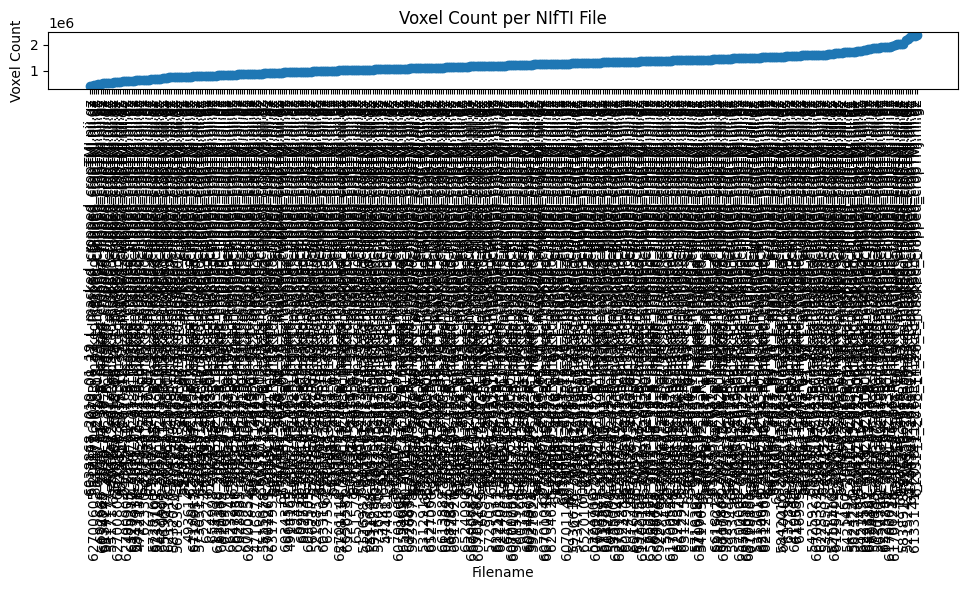

In [4]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by='Infomative voxel')

# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['Filename'], df_sorted['Infomative voxel'])
plt.xticks(rotation=90)
plt.xlabel('Filename')
plt.ylabel('Voxel Count')
plt.title('Voxel Count per NIfTI File')
plt.tight_layout()
plt.show()